<a href="https://colab.research.google.com/github/dhyannn/Computer-vision/blob/main/dhyan_cv_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.imread('/content/cat.jpg')

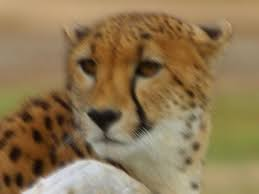

In [ ]:
cv2_imshow(image)

In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

In [ ]:
filtered_image = cv2.filter2D(image, -1, kernel)


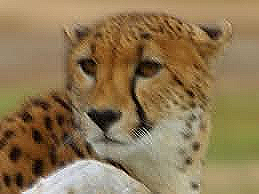

In [ ]:
cv2_imshow(filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Now, let's implement a user-defined function for linear spatial filtering:



In [ ]:
image.shape

(194, 259, 3)

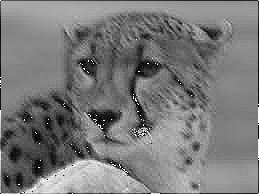

In [4]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def linear_filter(image, kernel):
    # Get dimensions of the kernel
    kernel_height, kernel_width = kernel.shape

    # Get dimensions of the image
    image_height, image_width = image.shape

    # Create an empty array to store the filtered image
    filtered_image = np.zeros_like(image)

    # Iterate over each pixel in the image
    for y in range(image_height):
        for x in range(image_width):
            # Extract the region from the image
            y_start = max(0, y - (kernel_height // 2))
            y_end = min(image_height, y + (kernel_height // 2) + 1)
            x_start = max(0, x - (kernel_width // 2))
            x_end = min(image_width, x + (kernel_width // 2) + 1)

            region = image[y_start:y_end, x_start:x_end]

            # Apply the kernel
            filtered_image[y, x] = np.sum(region * kernel[:y_end - y_start, :x_end - x_start])

    return filtered_image

# Example usage:
image = cv2.imread('/content/cat.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

filtered_image_custom = linear_filter(image, kernel)
cv2_imshow(filtered_image_custom)
cv2.waitKey(0)
cv2.destroyAllWindows()
